<a href="https://colab.research.google.com/github/KangJ0n0/Datmin/blob/main/analisis_sentimen_blibli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'blibli.mobile.commerce',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9d9b0135-a3b8-4337-aad8-9091e9c9671f,Kim Gadget,https://play-lh.googleusercontent.com/a/ACg8oc...,"Kecewaa berat.. lama jd pelanggan Blibli, tp p...",1,24,11.2.0,2024-05-17 02:23:29,Halo kak Kim mohon maaf perihal voucher & pemb...,2024-05-17 05:50:15,11.2.0
1,5157daa2-a6d4-4095-8780-a8d0c05bf815,Vincenzo Leonard Susanto,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sangat Mengecewakan, saya sudah lama jadi peng...",1,33,11.1.0,2024-05-10 00:16:24,Halo kak! mohon maaf terkait proses transaksi ...,2024-05-10 01:05:27,11.1.0
2,5229c268-59d2-4e84-b0bd-c74b91ecada3,Adi Gunawan,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi belanja sekaligus pembayaran terbaik ...,5,62,11.2.0,2024-05-18 04:45:38,Hi kak! Makasih banget ya udah menjadikan blib...,2024-05-18 04:47:27,11.2.0
3,7504ec4a-f2bb-437c-a2a2-f6298b7589cc,Bung Yuddy,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi semakin gak jelas dan membingungkan s...,1,6,11.2.0,2024-05-17 11:33:49,Halo kak Yuddy mohon maaf terkait penggabungan...,2024-05-17 14:56:01,11.2.0
4,cdb51ed3-474b-4b52-9ff3-049e73b1b71b,Renaldy,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,2,11.2.1,2024-06-02 09:10:31,Halo kak Renaldy mohon maaf terkait kendalanya...,2024-06-02 09:33:21,11.2.1


In [ ]:
len(df_busu.index)

1000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Kim Gadget,1,2024-05-17 02:23:29,"Kecewaa berat.. lama jd pelanggan Blibli, tp p..."
1,Vincenzo Leonard Susanto,1,2024-05-10 00:16:24,"Sangat Mengecewakan, saya sudah lama jadi peng..."
2,Adi Gunawan,5,2024-05-18 04:45:38,Aplikasi belanja sekaligus pembayaran terbaik ...
3,Bung Yuddy,1,2024-05-17 11:33:49,Aplikasi semakin gak jelas dan membingungkan s...
4,Renaldy,1,2024-06-02 09:10:31,"Sudah 1tahun belanja di blibli, tapi hari ini ..."


In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #sort berdasarkan dari yang terbaru.
sorted_df.head()

,userName,score,at,content
113,JKahmad Rhjo,5,2024-06-04 04:47:10,mudah mencari barang mudah cara bayarnya...
592,Bima Januar,5,2024-06-03 00:51:18,"pertama coba ,nanti rate lagi"
123,Sahroni,3,2024-06-02 22:28:27,harganya plus pengiriman masih mahal
36,Dwi Harto Priyo Utomo,1,2024-06-02 17:27:41,"Aplikasi jelek, cancel pesanan aja gabisa. Gam..."
39,Edi Gunawan,5,2024-06-02 15:03:34,"keren ,mudah digunakan, banyak fitur dan promosi."


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #menyimpan ke variabel

In [ ]:
my_df=my_df[['content', 'score']]

In [ ]:
my_df.head()

,content,score
113,mudah mencari barang mudah cara bayarnya...,5
592,"pertama coba ,nanti rate lagi",5
123,harganya plus pengiriman masih mahal,3
36,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1
39,"keren ,mudah digunakan, banyak fitur dan promosi.",5


In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
113,mudah mencari barang mudah cara bayarnya...,5,Positif
592,"pertama coba ,nanti rate lagi",5,Positif
123,harganya plus pengiriman masih mahal,3,None
36,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif
39,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif
577,aplikasi jujur dan cepet responsenya,5,Positif
4,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif
584,tolong dong di acc pengajuainya. dibantu;(,5,Positif
98,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif
586,cepat tuntas keren,5,Positif


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

Melakukan pembersihan data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,mudah mencari barang mudah cara bayarnya...,5,Positif
1,"pertama coba ,nanti rate lagi",5,Positif
2,harganya plus pengiriman masih mahal,3,NaN
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif
5,aplikasi jujur dan cepet responsenya,5,Positif
6,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif
7,tolong dong di acc pengajuainya. dibantu;(,5,Positif
8,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif
9,cepat tuntas keren,5,Positif


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    928 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
my_df.isna() #menampilkan nilai nan

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [ ]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe()

,score
count,1000.000000
mean,2.900000
std,1.799232
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [ ]:
my_df.isnull().sum()  #nilai label yang memiliki nilai kosong

content     0
score       0
Label      72
dtype: int64

mengatasi missing value

In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.head(50)

,content,score,Label
0,mudah mencari barang mudah cara bayarnya...,5,Positif
1,"pertama coba ,nanti rate lagi",5,Positif
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif
5,aplikasi jujur dan cepet responsenya,5,Positif
6,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif
7,tolong dong di acc pengajuainya. dibantu;(,5,Positif
8,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif
9,cepat tuntas keren,5,Positif
10,cakep bgt... tapi bli bli paylater saya blom d...,5,Positif


In [ ]:
my_df.to_csv("bliblipreprocessing.csv", index = False)  #simpan hasil file data cleaning

melakukan preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bliblipreprocessing.csv')
df.head(50)

,content,score,Label
0,mudah mencari barang mudah cara bayarnya...,5,Positif
1,"pertama coba ,nanti rate lagi",5,Positif
2,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif
3,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif
4,aplikasi jujur dan cepet responsenya,5,Positif
5,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif
6,tolong dong di acc pengajuainya. dibantu;(,5,Positif
7,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif
8,cepat tuntas keren,5,Positif
9,cakep bgt... tapi bli bli paylater saya blom d...,5,Positif


In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,mudah mencari barang mudah cara bayarnya...,5,Positif,mudah mencari barang mudah cara bayarnya
1,"pertama coba ,nanti rate lagi",5,Positif,pertama coba nanti rate lagi
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif,aplikasi jelek cancel pesanan aja gabisa gamau...
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif,keren mudah digunakan banyak fitur dan promosi
5,aplikasi jujur dan cepet responsenya,5,Positif,aplikasi jujur dan cepet responsenya
6,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif,sudah tahun belanja di blibli tapi hari ini ap...
7,tolong dong di acc pengajuainya. dibantu;(,5,Positif,tolong dong di acc pengajuainya dibantu
8,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif,promo tagihan jarang dan paylaternya mahal pad...
9,cepat tuntas keren,5,Positif,cepat tuntas keren
10,cakep bgt... tapi bli bli paylater saya blom d...,5,Positif,cakep bgt tapi bli bli paylater saya blom di a...


In [ ]:
#menghapus stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,mudah mencari barang mudah cara bayarnya...,5,Positif,mudah mencari barang mudah cara bayarnya,mudah mencari barang mudah bayarnya
1,"pertama coba ,nanti rate lagi",5,Positif,pertama coba nanti rate lagi,coba rate
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif,aplikasi jelek cancel pesanan aja gabisa gamau...,aplikasi jelek cancel pesanan aja gabisa gamau...
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif,keren mudah digunakan banyak fitur dan promosi,keren mudah fitur promosi
5,aplikasi jujur dan cepet responsenya,5,Positif,aplikasi jujur dan cepet responsenya,aplikasi jujur cepet responsenya
6,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif,sudah tahun belanja di blibli tapi hari ini ap...,belanja blibli aplikasinya gak dibuka gabung p...
7,tolong dong di acc pengajuainya. dibantu;(,5,Positif,tolong dong di acc pengajuainya dibantu,tolong acc pengajuainya dibantu
8,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif,promo tagihan jarang dan paylaternya mahal pad...,promo tagihan jarang paylaternya mahal coba ha...
9,cepat tuntas keren,5,Positif,cepat tuntas keren,cepat tuntas keren
10,cakep bgt... tapi bli bli paylater saya blom d...,5,Positif,cakep bgt tapi bli bli paylater saya blom di a...,cakep bgt bli bli paylater blom approval


In [ ]:
#melakukan tokenizing
#proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di
#analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.
#Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,mudah mencari barang mudah cara bayarnya...,5,Positif,mudah mencari barang mudah cara bayarnya,mudah mencari barang mudah bayarnya,"[mudah, mencari, barang, mudah, bayarnya]"
1,"pertama coba ,nanti rate lagi",5,Positif,pertama coba nanti rate lagi,coba rate,"[coba, rate]"
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif,aplikasi jelek cancel pesanan aja gabisa gamau...,aplikasi jelek cancel pesanan aja gabisa gamau...,"[aplikasi, jelek, cancel, pesanan, aja, gabisa..."
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif,keren mudah digunakan banyak fitur dan promosi,keren mudah fitur promosi,"[keren, mudah, fitur, promosi]"
5,aplikasi jujur dan cepet responsenya,5,Positif,aplikasi jujur dan cepet responsenya,aplikasi jujur cepet responsenya,"[aplikasi, jujur, cepet, responsenya]"


Stemming
proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

4183
------------------------
1 : mudah : mudah
2 : mencari : cari
3 : barang : barang
4 : bayarnya : bayar
5 : coba : coba
6 : rate : rate
7 : aplikasi : aplikasi
8 : jelek : jelek
9 : cancel : cancel
10 : pesanan : pesan
11 : aja : aja
12 : gabisa : gabisa
13 : gamau : gamau
14 : belanja : belanja
15 : cuih : cuih
16 : keren : keren
17 : fitur : fitur
18 : promosi : promosi
19 : jujur : jujur
20 : cepet : cepet
21 : responsenya : responsenya
22 : blibli : blibli
23 : aplikasinya : aplikasi
24 : gak : gak
25 : dibuka : buka
26 : gabung : gabung
27 : poin : poin
28 : ranch : ranch
29 : begituan : begitu
30 : freeze : freeze
31 : tolong : tolong
32 : acc : acc
33 : pengajuainya : pengajuainya
34 : dibantu : bantu
35 : promo : promo
36 : tagihan : tagih
37 : jarang : jarang
38 : paylaternya : paylaternya
39 : mahal : mahal
40 : harganya : harga
41 : kalahi : kalah
42 : promonnya : promonnya
43 : cepat : cepat
44 : tuntas : tuntas
45 : cakep : cakep
46 : bgt : bgt
47 : bli : bli
48 : payl

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,mudah mencari barang mudah cara bayarnya...,5,Positif,mudah mencari barang mudah cara bayarnya,mudah mencari barang mudah bayarnya,"[mudah, mencari, barang, mudah, bayarnya]",mudah cari barang mudah bayar
1,"pertama coba ,nanti rate lagi",5,Positif,pertama coba nanti rate lagi,coba rate,"[coba, rate]",coba rate
3,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,Negatif,aplikasi jelek cancel pesanan aja gabisa gamau...,aplikasi jelek cancel pesanan aja gabisa gamau...,"[aplikasi, jelek, cancel, pesanan, aja, gabisa...",aplikasi jelek cancel pesan aja gabisa gamau b...
4,"keren ,mudah digunakan, banyak fitur dan promosi.",5,Positif,keren mudah digunakan banyak fitur dan promosi,keren mudah fitur promosi,"[keren, mudah, fitur, promosi]",keren mudah fitur promosi
5,aplikasi jujur dan cepet responsenya,5,Positif,aplikasi jujur dan cepet responsenya,aplikasi jujur cepet responsenya,"[aplikasi, jujur, cepet, responsenya]",aplikasi jujur cepet responsenya
6,"Sudah 1tahun belanja di blibli, tapi hari ini ...",1,Negatif,sudah tahun belanja di blibli tapi hari ini ap...,belanja blibli aplikasinya gak dibuka gabung p...,"[belanja, blibli, aplikasinya, gak, dibuka, ga...",belanja blibli aplikasi gak buka gabung poin r...
7,tolong dong di acc pengajuainya. dibantu;(,5,Positif,tolong dong di acc pengajuainya dibantu,tolong acc pengajuainya dibantu,"[tolong, acc, pengajuainya, dibantu]",tolong acc pengajuainya bantu
8,Promo tagihan jarang dan paylaternya mahal pad...,1,Negatif,promo tagihan jarang dan paylaternya mahal pad...,promo tagihan jarang paylaternya mahal coba ha...,"[promo, tagihan, jarang, paylaternya, mahal, c...",promo tagih jarang paylaternya mahal coba harg...
9,cepat tuntas keren,5,Positif,cepat tuntas keren,cepat tuntas keren,"[cepat, tuntas, keren]",cepat tuntas keren
10,cakep bgt... tapi bli bli paylater saya blom d...,5,Positif,cakep bgt tapi bli bli paylater saya blom di a...,cakep bgt bli bli paylater blom approval,"[cakep, bgt, bli, bli, paylater, blom, approval]",cakep bgt bli bli paylater blom approval


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_blibli.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

melakukan splitting data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(742,)
(742,)
(186,)
(186,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_blibli.csv')

MultinomialNB Accuracy: 0.8655913978494624
MultinomialNB Precision: 0.8557692307692307
MultinomialNB Recall: 0.898989898989899
MultinomialNB f1_score: 0.8768472906403941
confusion_matrix:
 [[89 10]
 [15 72]]

              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88        99
     Positif       0.88      0.83      0.85        87

    accuracy                           0.87       186
   macro avg       0.87      0.86      0.86       186
weighted avg       0.87      0.87      0.87       186



In [ ]:
data_clean['Label'].value_counts()

Label
0    494
1    434
Name: count, dtype: int64

In [ ]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = nb.predict(new_text_vec)

if predicted_sentimen[0] == 'Positif':
    sentiment_label = "positif"
elif predicted_sentimen[0] == 'Negatif':
    sentiment_label = "negatif"

print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)


Masukkan teks baru: baik sekali memang
Hasil Analisis Sentimen untuk Teks Baru : positif


In [ ]:
data_clean = data_clean.replace({'Positif':1, 'Negatif':0})
data_clean.head()

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,mudah mencari barang mudah cara bayarnya...,5,1,mudah mencari barang mudah cara bayarnya,mudah mencari barang mudah bayarnya,"['mudah', 'mencari', 'barang', 'mudah', 'bayar...",mudah cari barang mudah bayar
1,"pertama coba ,nanti rate lagi",5,1,pertama coba nanti rate lagi,coba rate,"['coba', 'rate']",coba rate
2,"Aplikasi jelek, cancel pesanan aja gabisa. Gam...",1,0,aplikasi jelek cancel pesanan aja gabisa gamau...,aplikasi jelek cancel pesanan aja gabisa gamau...,"['aplikasi', 'jelek', 'cancel', 'pesanan', 'aj...",aplikasi jelek cancel pesan aja gabisa gamau b...
3,"keren ,mudah digunakan, banyak fitur dan promosi.",5,1,keren mudah digunakan banyak fitur dan promosi,keren mudah fitur promosi,"['keren', 'mudah', 'fitur', 'promosi']",keren mudah fitur promosi
4,aplikasi jujur dan cepet responsenya,5,1,aplikasi jujur dan cepet responsenya,aplikasi jujur cepet responsenya,"['aplikasi', 'jujur', 'cepet', 'responsenya']",aplikasi jujur cepet responsenya


In [ ]:
data_negatif = data_clean[data_clean['Label'] == 0]
data_positif = data_clean[data_clean['Label'] == 1]

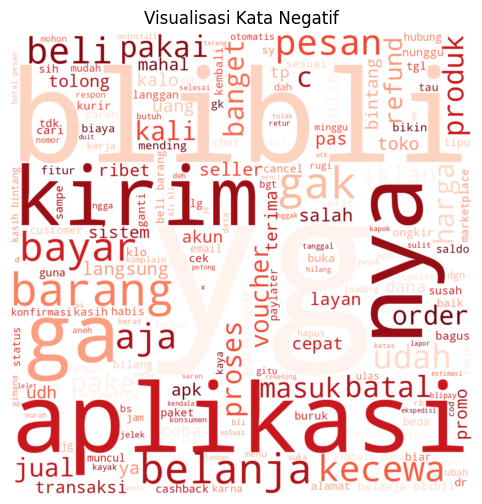

In [ ]:
all_text_s0 = ' '.join(word for word in data_negatif["text_steamindo"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

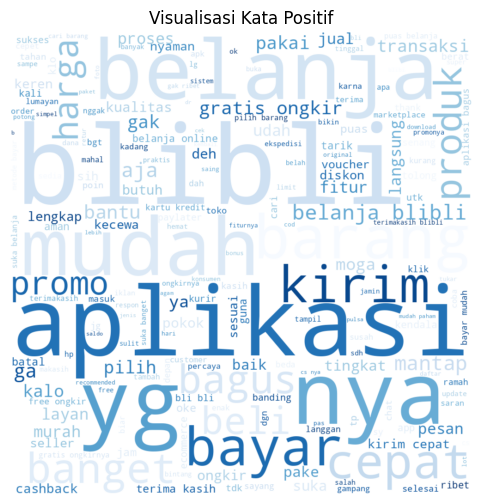

In [ ]:
all_text_s1 = ' '.join(word for word in data_positif["text_steamindo"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()